In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import joblib
    

In [4]:

# Load the datasets
data_pt1 = pd.read_csv('../output_videos/collected_dataPT1.csv')
data_pt2 = pd.read_csv('../output_videos/collected_dataPT2.csv')
data_pt3 = pd.read_csv('../output_videos/collected_dataPT6.csv')
data_ptTEST = pd.read_csv('../output_videos/collected_dataTEST.csv')
data_ptTEST2 = pd.read_csv('../output_videos/collected_dataTEST2.csv')
data_ptTEST3 = pd.read_csv('../output_videos/collected_dataTEST3.csv')
data_ptTEST4 = pd.read_csv('../output_videos/collected_dataTEST4.csv')

# Combine the data into a single DataFrame
combined_data = pd.concat([data_pt1, data_pt2, data_pt3, data_ptTEST, data_ptTEST2, data_ptTEST3, data_ptTEST4], ignore_index=True)
    

In [11]:
# Preprocess the data
X = combined_data.drop(['point_winner', 'frame_completion_ratio'], axis=1)
y = combined_data['point_winner']
print(X.shape, y.shape)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(33, 7) (33,)


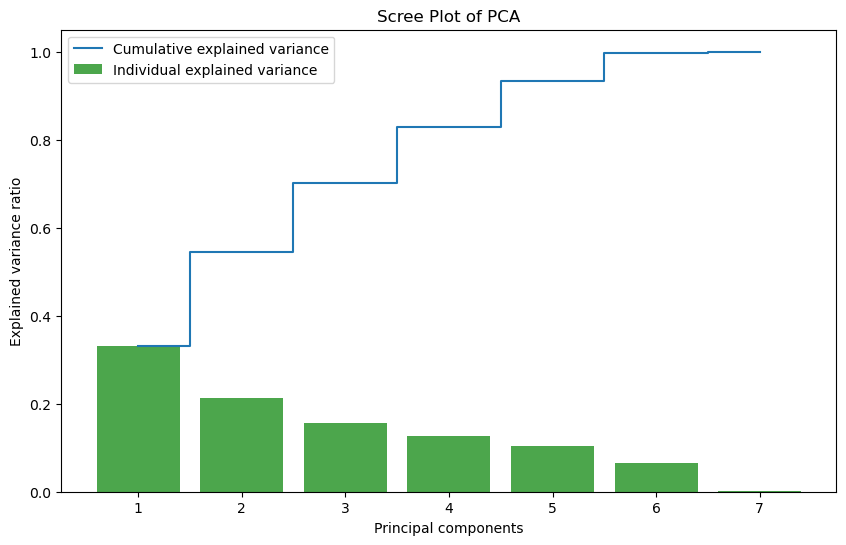

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
pca.fit(X_scaled)

# Percentage of variance explained by each of the selected components
variance = pca.explained_variance_ratio_

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(variance) + 1), variance, alpha=0.7, color='g', label='Individual explained variance')
plt.step(range(1, len(variance) + 1), variance.cumsum(), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Scree Plot of PCA')
plt.legend(loc='best')
plt.show()

In [7]:
# Create a pipeline with a scaler and logistic regression
pipeline = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Report:", report)
    

Accuracy: 0.7142857142857143
Report:               precision    recall  f1-score   support

           1       0.75      0.75      0.75         4
           2       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.71      0.71      0.71         7
weighted avg       0.71      0.71      0.71         7



In [9]:
X = combined_data.drop(['point_winner', 'frame_completion_ratio'], axis=1)
y = combined_data['point_winner']

# Fit the model on the entire dataset

pipeline.fit(X, y)

# Save the model
model_path = './logistic_regression_model.pth'
joblib.dump(pipeline, model_path)
    

['./logistic_regression_model.pth']

In [10]:
model = joblib.load('./logistic_regression_model.pth')
data = {
            'player_shot_ball': 1,
            'shot_speed': 41,
            'player_1_position_x': 1693,
            'player_1_position_y': 536,
            'player_2_position_x': 1770,
            'player_2_position_y': 72,
            'player_serve': 2
        }
data_df = pd.DataFrame([data])
print(model.predict_proba(data_df))
model

[[0.42352269 0.57647731]]


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression())])